In [71]:

from math import sqrt
from sklearn.cluster import MiniBatchKMeans 
import pandas_datareader as dr
from matplotlib import pyplot as plt
import pandas as pd
import matplotlib.cm as cm
import seaborn as sn

start = '2019-1-1'
end = '2020-1-1'

tickers = ['AXP','AAPL','BA','CAT','CSCO','CVX','XOM','GS','HD','IBM','INTC','JNJ','KO','JPM','MCD',	'MMM',	'MRK',	'MSFT',	'NKE','PFE','PG','TRV','UNH','RTX','VZ','V','WBA','WMT','DIS','DOW']
prices_list = []
for ticker in tickers:
    try:
        prices = dr.DataReader(ticker,'yahoo',start)['Adj Close']
        prices = pd.DataFrame(prices)
        prices.columns = [ticker]
        prices_list.append(prices)
    except:
        pass
    prices_df = pd.concat(prices_list,axis=1)
prices_df.sort_index(inplace=True)
prices_df.head()


,AXP,AAPL,BA,CAT,CSCO,CVX,XOM,GS,HD,IBM,...,PG,TRV,UNH,RTX,VZ,V,WBA,WMT,DIS,DOW
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,93.030258,154.794983,314.645142,120.930229,40.754570,103.618286,64.316460,166.490067,165.733612,107.361145,...,87.674057,113.210297,237.385666,65.560333,52.042557,131.661087,64.655563,90.685211,107.654343,NaN
2019-01-03,91.214363,139.376251,302.100555,116.270241,39.272411,101.633728,63.328960,164.051193,162.080765,105.217842,...,87.059349,111.175079,230.912094,62.642502,52.228363,126.916458,63.980862,90.218872,105.046211,NaN
2019-01-04,95.324547,145.326126,317.822601,122.623909,41.041435,103.739975,65.663887,169.412827,166.896759,109.327393,...,88.836266,114.473862,233.612671,64.785484,52.358418,132.384171,66.109451,90.782379,108.286606,NaN
2019-01-07,95.841965,145.002686,318.823395,122.700462,41.318741,105.087990,66.005356,170.351578,170.184296,110.100861,...,88.480881,114.107330,234.061142,64.755219,52.692863,134.771347,66.489548,91.851089,109.225136,NaN
2019-01-08,96.310577,147.766861,330.891937,124.174049,41.653427,104.629288,66.485252,169.722504,171.001389,111.666405,...,88.807457,113.663628,237.190628,65.923546,54.235001,135.504349,67.819908,92.492317,110.074753,NaN


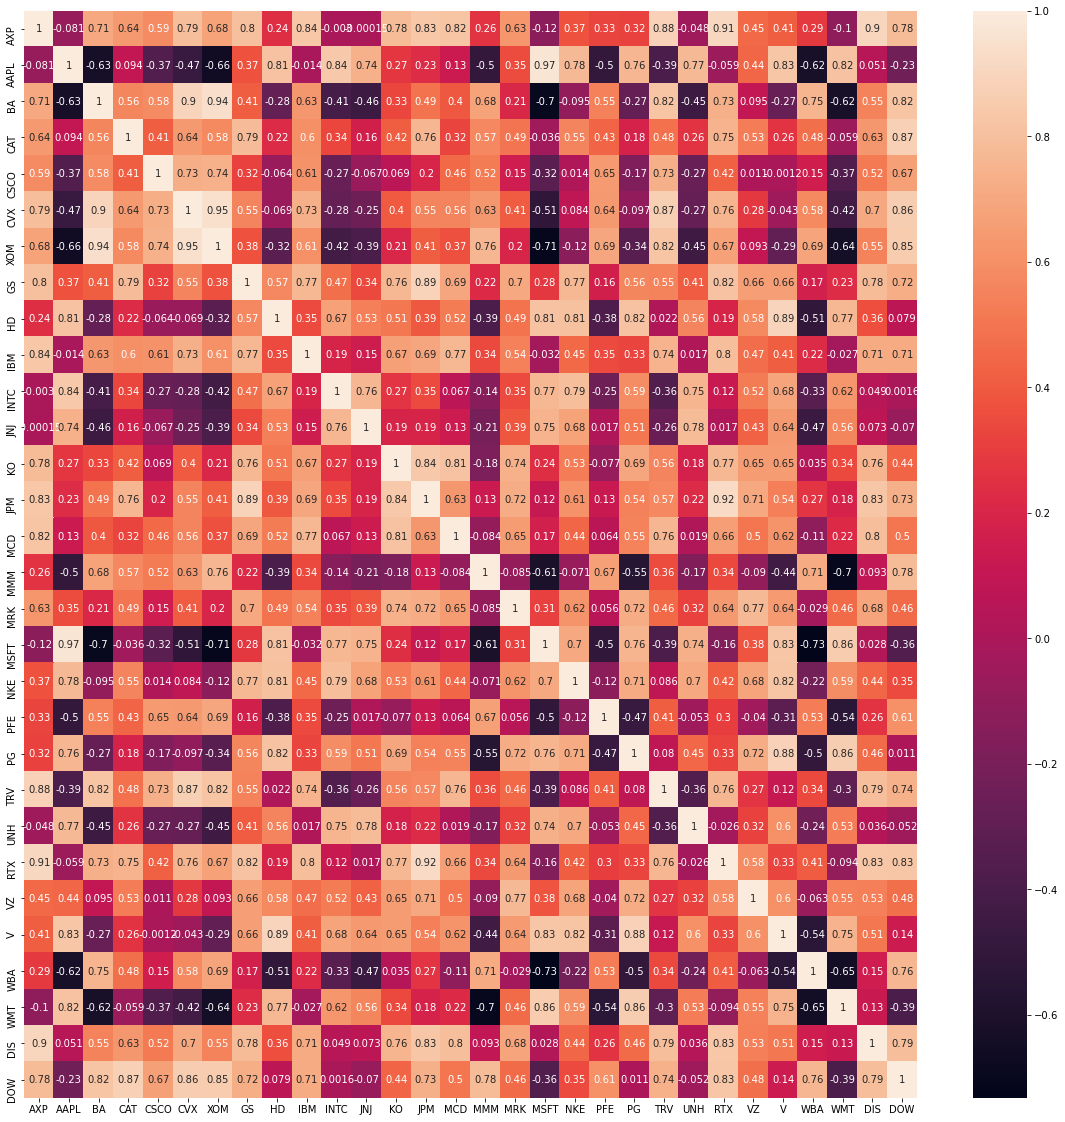

In [72]:

corr = prices_df.corr()
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(prices_df.corr(), annot = True, ax=ax)


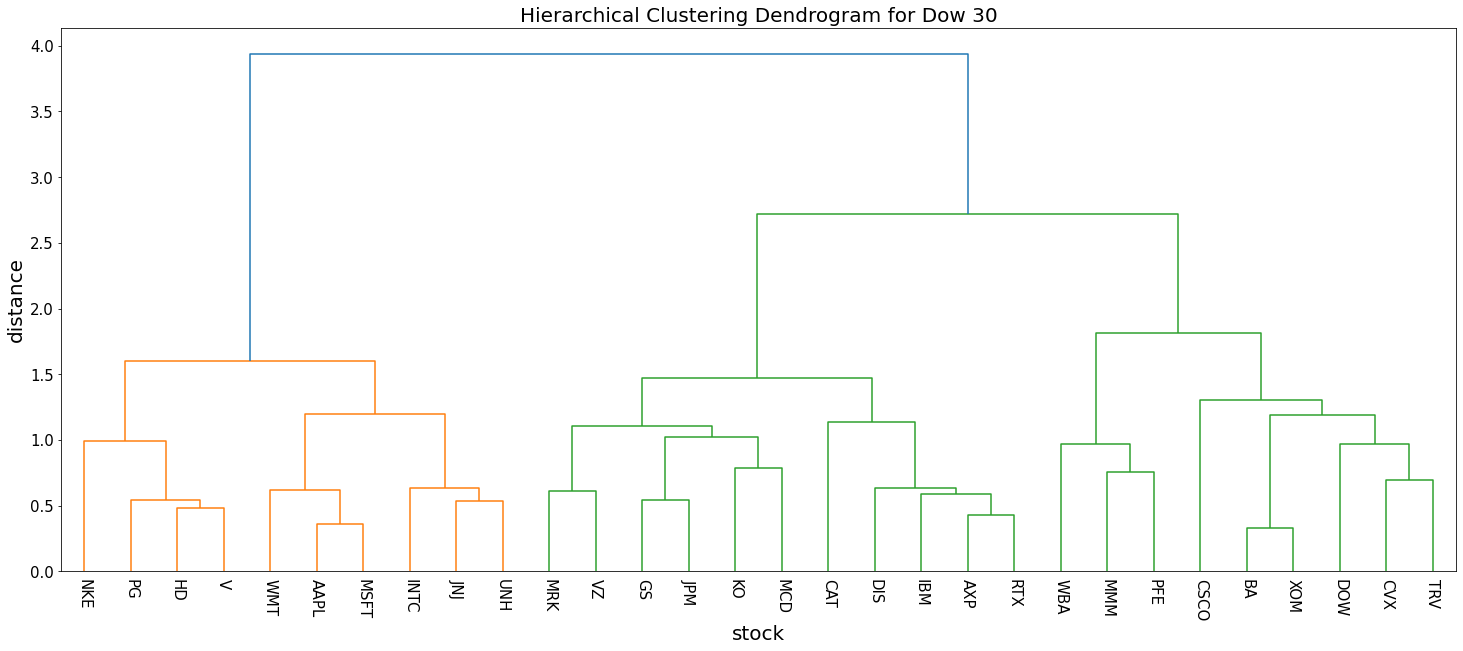

In [74]:

# Hierarchial Clustering of Stocks
labels = prices_df.columns.tolist()

from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(corr, 'average')


from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import pylab


plt.figure(figsize=(25, 10))
labelsize=20
ticksize=15
plt.title('Hierarchical Clustering Dendrogram for Dow 30', fontsize=labelsize)
plt.xlabel('stock', fontsize=labelsize)
plt.ylabel('distance', fontsize=labelsize)
dendrogram(
    Z,
    leaf_rotation=90,  # rotates the x axis labels
    leaf_font_size=8,  # font size for the x axis labels
    labels=labels
)
pylab.yticks(fontsize=ticksize)
pylab.xticks(rotation=-90, fontsize=ticksize)
#plt.savefig('img/dendogram_'+index+'.png')
plt.show()


Text(0.5, 1.0, 'Elbow curve')

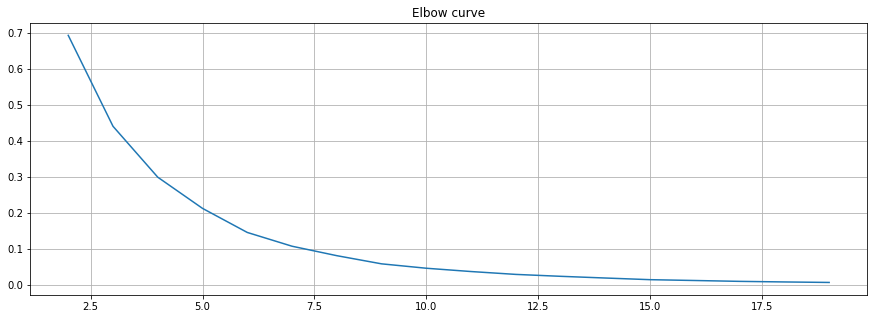

In [75]:

#Calculate average annual percentage return and volatilities over a theoretical one year period
returns = prices_df.pct_change().mean() * 252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns['Volatility'] = prices_df.pct_change().std() * sqrt(252)
#format the data as a numpy array to feed into the K-Means algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T
X = data
distorsions = []
for k in range(2, 20):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    distorsions.append(k_means.inertia_)
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')


Text(0.5, 0.92, 'K Means')

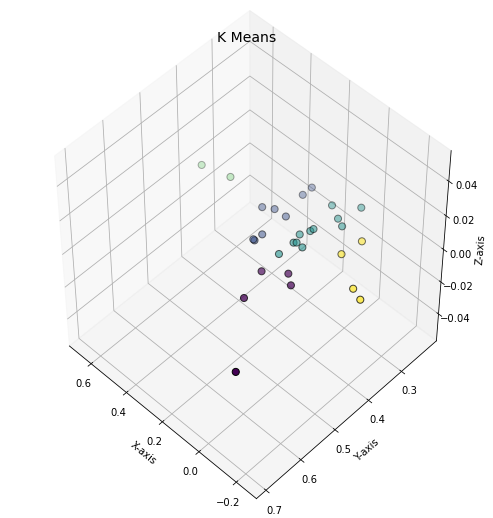

In [77]:

# 3D Plot of KMeans
km = KMeans(n_clusters=5)
km.fit(X)
km.predict(X)
labels = km.labels_#Plotting
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(X[:, 0], X[:, 1], 
          c=labels.astype(np.float), edgecolor="k", s=50)
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
plt.title("K Means", fontsize=14)


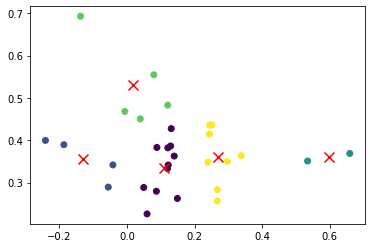

In [78]:

# Plot KMeans with Centroids
#K-Means

from scipy.cluster.vq import kmeans,vq
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

returns = prices_df.pct_change().mean() * 252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns['Volatility'] = prices_df.pct_change().std() * sqrt(252)
#format the data as a numpy array to feed into the K-Means algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T
X = data

kmeans = KMeans(n_clusters=5).fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_
plt.scatter(data[:,0],data[:,1],c=y_kmeans)
plt.scatter(centers[:,0],centers[:,1],c='red',s=100,marker='x')
plt.show()


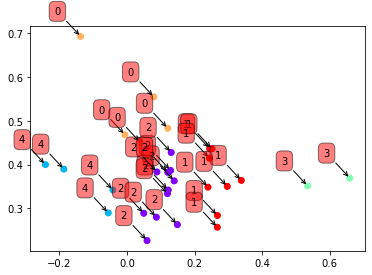

In [79]:

# KMeans with annotations
plt.subplots_adjust(bottom = 0.1)
plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_, cmap='rainbow') 

for label, x, y in zip(labels, data[:, 0], data[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='red', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.show()


<Figure size 432x288 with 0 Axes>

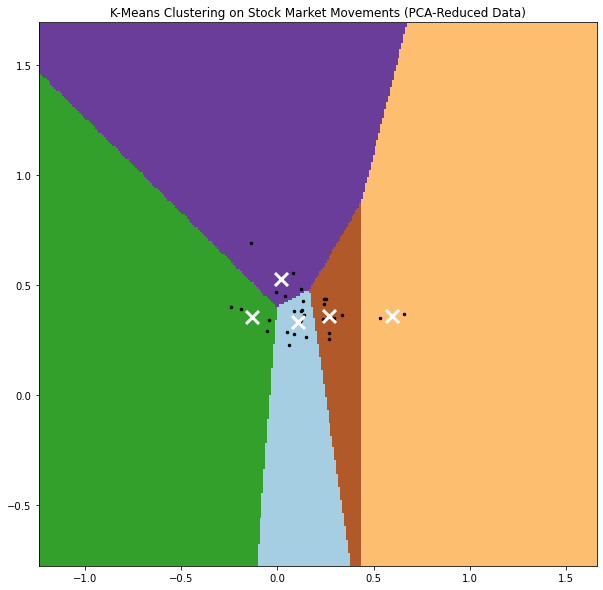

In [80]:

# KMEans always has non-overlapping boundaries
# Define step size of mesh
h = 0.01

# plot the decision boundary
x_min, x_max = data[:, 0].min() - 1, data[:,0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain abels for each point in the mesh using our trained model
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

# define colorplot
cmap = plt.cm.Paired

# plot figure
plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(Z, interpolation='nearest',
 extent = (xx.min(), xx.max(), yy.min(), yy.max()),
 cmap = cmap,
 aspect = 'auto', origin='lower')
plt.plot(data[:, 0], data[:, 1], 'k.', markersize=5)


# plot the centroid of each cluster as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
 marker='x', s=169, linewidth=3,
 color='w', zorder=10)

plt.title('K-Means Clustering on Stock Market Movements (PCA-Reduced Data)')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()


In [81]:

# List of tickers and cluter IDs
details = [(name,cluster) for name, cluster in zip(returns.index,labels)]
for detail in details:
    print(detail)


('AXP', 0)
('AAPL', 3)
('BA', 0)
('CAT', 2)
('CSCO', 2)
('CVX', 0)
('XOM', 4)
('GS', 1)
('HD', 1)
('IBM', 2)
('INTC', 1)
('JNJ', 2)
('KO', 2)
('JPM', 2)
('MCD', 2)
('MMM', 4)
('MRK', 2)
('MSFT', 3)
('NKE', 1)
('PFE', 4)
('PG', 1)
('TRV', 2)
('UNH', 1)
('RTX', 0)
('VZ', 2)
('V', 1)
('WBA', 4)
('WMT', 1)
('DIS', 2)
('DOW', 0)


In [ ]:

# Data:
# Automatically imported from 'pandas_datareader'
